# Test File for LSPair

## Packages

In [1]:
import sys
import matplotlib
import datetime as dt
import yfinance as yf

from LSPair import *

## Let's get some sample data

In [2]:
try:

    df = pd.read_parquet(
        path = "agency_df.parquet", 
        engine = "pyarrow")

    end_date = dt.date(year = 2023, month = 4, day = 5)
    start_date = dt.date(year = end_date.year - 6, month = 1, day = 1)
  
except:

    tickers = ["CMBS", "VMBS", "MBB"]
    end_date = dt.date(year = 2023, month = 4, day = 5)
    start_date = dt.date(year = end_date.year - 6, month = 1, day = 1)

    df = (yf.download(
        tickers = tickers,
        start = start_date,
        end = end_date).
        reset_index().
        melt(id_vars = "Date").
        rename(columns = {
            "variable_0": "ticker_type", 
            "variable_1": "ticker"}))

    df.to_parquet(
      path = "agency_df.parquet",
      engine = "pyarrow")
  

df = (df.query(
    "ticker_type == 'Adj Close'").
    drop(columns = ["ticker_type"]).
    pivot(index = "Date", columns = "ticker", values = "value").
    pct_change().
    dropna())

## Initialization Tests

Load data in LSPair

In [3]:
ls_pair = LSPair(
    long_position = df.VMBS,
    short_position = df.CMBS,
    benchmark = df.MBB)

### Check regression Stats

In [4]:
def try_fail(test, name):
    try:
        test
        print("[INFO] Successfully Completed {} Test".format(name))
    except:
        print("[ALERT] Failed to Complete {} Test".format(name))
        sys.quit()
        
def try_stat_regression_test():
    
    try_fail(ls_pair.in_sample_long_lm_res, "In-Sample Long Regression")
    try_fail(ls_pair.out_sample_long_lm_res, "Out-Sample Long Regression")
    try_fail(ls_pair.full_sample_long_lm_res, "Full-Sample Long Regression")
    try_fail(ls_pair.in_sample_short_lm_res, "In-Sample Short Regression")
    try_fail(ls_pair.out_sample_short_lm_res, "Out-Sample Short Regression")
    try_fail(ls_pair.full_sample_short_lm_res, "Full-Sample Short Regression")
    print("[INFO] Completed All Regression Sample Tests")
    
#try_stat_regression_test()

## Plotting Test

In [5]:
'''
try_fail(ls_pair.plot_regress(), "In-Sample Regression")
try_fail(ls_pair.plot_out_regress(), "Out-of-Sample Regression")
try_fail(ls_pair.plot_full_regress(), "Ful-Sample Regression")
'''

'\ntry_fail(ls_pair.plot_regress(), "In-Sample Regression")\ntry_fail(ls_pair.plot_out_regress(), "Out-of-Sample Regression")\ntry_fail(ls_pair.plot_full_regress(), "Ful-Sample Regression")\n'

In [6]:
'''
try_fail(ls_pair.plot_cum(), "Cumualative Returns with fill")
try_fail(ls_pair.plot_out_sample_cum(), "Cumualative Returns with fill")
try_fail(ls_pair.plot_full_sample_cum(), "Cumualative Returns with fill")
'''

'\ntry_fail(ls_pair.plot_cum(), "Cumualative Returns with fill")\ntry_fail(ls_pair.plot_out_sample_cum(), "Cumualative Returns with fill")\ntry_fail(ls_pair.plot_full_sample_cum(), "Cumualative Returns with fill")\n'

In [7]:
'''
try_fail(ls_pair.plot_cum(fill = False), "In-Sample Cumualative Returns with fill")
try_fail(ls_pair.plot_out_sample_cum(fill = False), "Out-of-Sample Cumualative Returns with fill")
try_fail(ls_pair.plot_full_sample_cum(fill = False), "Full-Sample Cumualative Returns with fill")
'''

'\ntry_fail(ls_pair.plot_cum(fill = False), "In-Sample Cumualative Returns with fill")\ntry_fail(ls_pair.plot_out_sample_cum(fill = False), "Out-of-Sample Cumualative Returns with fill")\ntry_fail(ls_pair.plot_full_sample_cum(fill = False), "Full-Sample Cumualative Returns with fill")\n'

## Even Rebalance

In [8]:
'''
try_fail(ls_pair.generate_even_rebal_risk_premia(plot = True), "Even Rebalance plot with fill")
try_fail(ls_pair.generate_even_rebal_risk_premia(plot = True, fill = False), "Even Rebalance plot without fill")
'''

'\ntry_fail(ls_pair.generate_even_rebal_risk_premia(plot = True), "Even Rebalance plot with fill")\ntry_fail(ls_pair.generate_even_rebal_risk_premia(plot = True, fill = False), "Even Rebalance plot without fill")\n'

## Rolling OLS

In [9]:
#try_fail(ls_pair.rolling_ols(), "Rolling OLS")

,Date,parameter,value,variable,sample_group,position,ticker,benchmark_ticker
0,2017-02-15,beta,0.000031,value,in_sample,long,VMBS,MBB
1,2017-02-16,beta,0.000030,value,in_sample,long,VMBS,MBB
2,2017-02-17,beta,-0.000064,value,in_sample,long,VMBS,MBB
3,2017-02-21,beta,-0.000073,value,in_sample,long,VMBS,MBB
4,2017-02-22,beta,-0.000042,value,in_sample,long,VMBS,MBB
...,...,...,...,...,...,...,...,...
6171,2023-03-29,benchmark,0.998059,upper_0.975_conf,full_sample,short,CMBS,MBB
6172,2023-03-30,benchmark,0.998732,upper_0.975_conf,full_sample,short,CMBS,MBB
6173,2023-03-31,benchmark,1.010071,upper_0.975_conf,full_sample,short,CMBS,MBB
6174,2023-04-03,benchmark,1.015248,upper_0.975_conf,full_sample,short,CMBS,MBB


,Date,parameter,value,variable
0,2017-02-15,alpha,-0.000298,lower_0.025_conf
1,2017-02-16,alpha,-0.000298,lower_0.025_conf
2,2017-02-17,alpha,-0.000355,lower_0.025_conf
3,2017-02-21,alpha,-0.000365,lower_0.025_conf
4,2017-02-22,alpha,-0.000340,lower_0.025_conf
...,...,...,...,...
2139,2021-05-13,alpha,0.000188,upper_0.975_conf
2140,2021-05-14,alpha,0.000135,upper_0.975_conf
2141,2021-05-17,alpha,0.000108,upper_0.975_conf
2142,2021-05-18,alpha,0.000101,upper_0.975_conf


0       lower_0.025_conf
1072    upper_0.975_conf
Name: variable, dtype: object

[INFO] Successfully Completed Rolling OLS Plot with Confidence Interval Test


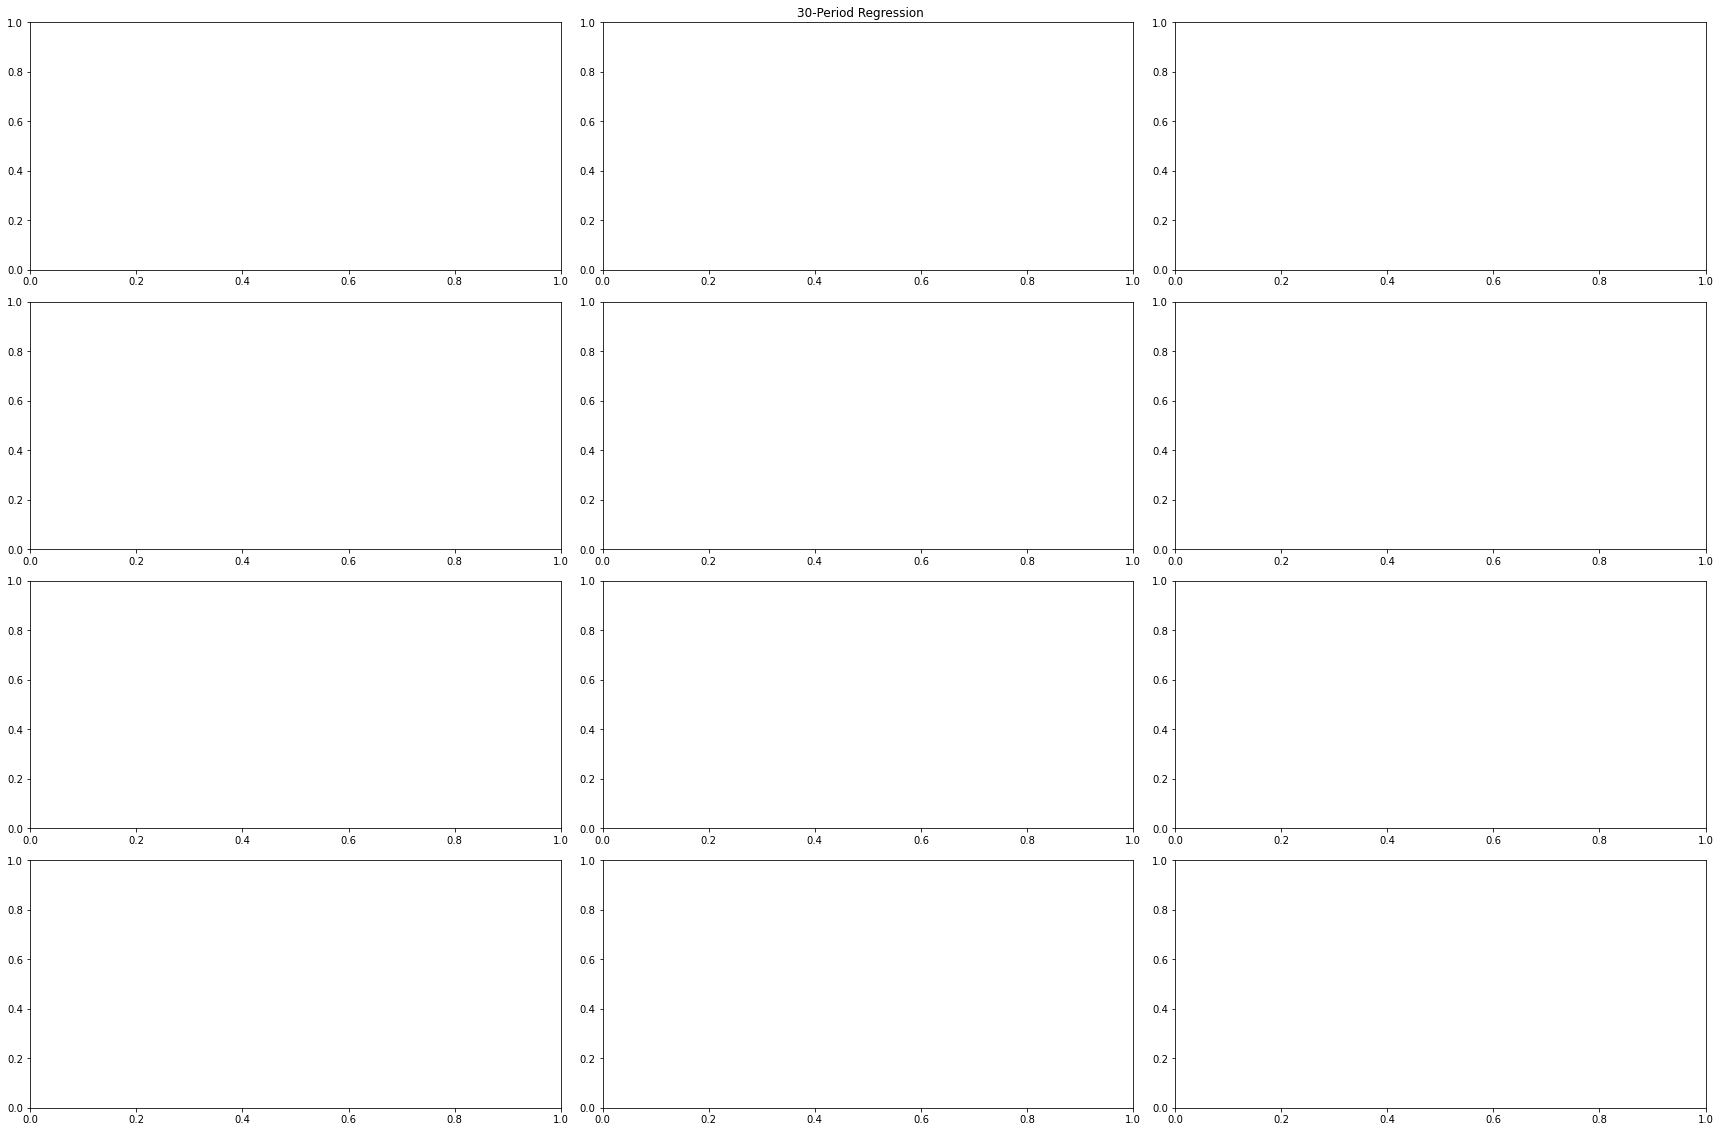

In [10]:
try_fail(ls_pair.plot_single_rolling_ols(window = 30), "Rolling OLS Plot with Confidence Interval")
#try_fail(ls_pair.plot_single_rolling_ols(window = 30, fill = False), "Rolling OLS Plot with Confidence Interval")

In [11]:
'''
try_fail(ls_pair.plot_single_rolling_ols_comparison(window = 30), "Rolling OLS Plot comparison without cofidence")
try_fail(ls_pair.plot_single_rolling_ols_comparison(window = 30, conf_int = 0.05), "Rolling OLS Plot comparison with Confidence Interval")
'''

'\ntry_fail(ls_pair.plot_single_rolling_ols_comparison(window = 30), "Rolling OLS Plot comparison without cofidence")\ntry_fail(ls_pair.plot_single_rolling_ols_comparison(window = 30, conf_int = 0.05), "Rolling OLS Plot comparison with Confidence Interval")\n'

In [12]:
#try_fail(ls_pair.plot_single_rolling_ols_parameter_comparison(ols_window = 30, corr_window = 30), "Rolling OLS Parameter Comparison")

In [13]:
#try_fail(ls_pair.plot_single_rolling_ols_hist(ols_window = 30), "Rolling OLS Plot Histogram")

In [14]:
#try_fail(ls_pair.plot_single_rolling_ols_contour(ols_window = 30), "Rolling OLS Plot Histogram")